<a href="https://colab.research.google.com/github/RicoHalim30/HR-Analytics/blob/main/HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Resource:** [HR Analytics: Job Change of Data Scientists](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree

from sklearn import metrics

# **First Step**

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/Data Science Rakamin Batch 31/Dataset/aug_train.csv")
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
test_data = pd.read_csv("/content/drive/MyDrive/Data Science Rakamin Batch 31/Dataset/aug_test.csv")
test_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [6]:
train_data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
test_data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [8]:
new_train_data = train_data.dropna()
new_train_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [9]:
new_test_data = test_data.dropna()
new_test_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
11,9272,city_90,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10/49,Pvt Ltd,2,51
12,14249,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,100-500,Other,never,48
16,7865,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,Pvt Ltd,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,10726,city_71,0.884,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,Public Sector,1,16
2115,13833,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Pvt Ltd,1,8
2117,21500,city_44,0.725,Male,No relevent experience,Part time course,Graduate,STEM,7,<10,Early Stage Startup,never,160
2121,27163,city_173,0.878,Male,No relevent experience,no_enrollment,Masters,STEM,16,<10,Pvt Ltd,>4,58


In [10]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8955 non-null   int64  
 1   city                    8955 non-null   object 
 2   city_development_index  8955 non-null   float64
 3   gender                  8955 non-null   object 
 4   relevent_experience     8955 non-null   object 
 5   enrolled_university     8955 non-null   object 
 6   education_level         8955 non-null   object 
 7   major_discipline        8955 non-null   object 
 8   experience              8955 non-null   object 
 9   company_size            8955 non-null   object 
 10  company_type            8955 non-null   object 
 11  last_new_job            8955 non-null   object 
 12  training_hours          8955 non-null   int64  
 13  target                  8955 non-null   float64
dtypes: float64(2), int64(2), object(10)
mem

In [11]:
new_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 3 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             1019 non-null   int64  
 1   city                    1019 non-null   object 
 2   city_development_index  1019 non-null   float64
 3   gender                  1019 non-null   object 
 4   relevent_experience     1019 non-null   object 
 5   enrolled_university     1019 non-null   object 
 6   education_level         1019 non-null   object 
 7   major_discipline        1019 non-null   object 
 8   experience              1019 non-null   object 
 9   company_size            1019 non-null   object 
 10  company_type            1019 non-null   object 
 11  last_new_job            1019 non-null   object 
 12  training_hours          1019 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 111.5+ KB


In [12]:
new_train_data = new_train_data.drop("enrollee_id", axis='columns')
new_train_data = new_train_data.drop("city", axis='columns')

new_test_data = new_test_data.drop("enrollee_id", axis='columns')
new_test_data = new_test_data.drop("city", axis='columns')

# **Visualization**

In [13]:
data_viz = new_train_data.reset_index()
data_viz

,index,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,7,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,8,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,11,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,19147,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
8951,19149,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
8952,19150,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
8953,19152,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [14]:
data_viz['index'] = data_viz.index
data_viz

,index,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,1,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,2,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,3,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,4,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,8950,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
8951,8951,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
8952,8952,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
8953,8953,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


Male      8073
Female     804
Other       78
Name: gender, dtype: int64 



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'gender')]

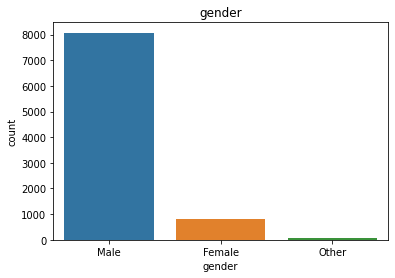

In [15]:
print(data_viz['gender'].value_counts(),'\n')

sns.countplot(data_viz['gender']).set(title='gender')

Has relevent experience    7851
No relevent experience     1104
Name: relevent_experience, dtype: int64 



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'relevent_experience')]

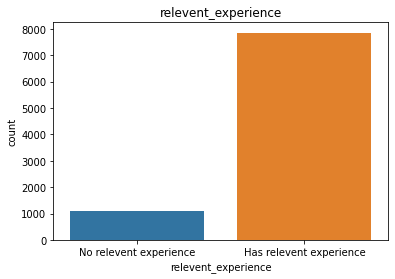

In [16]:
print(data_viz['relevent_experience'].value_counts(),'\n')

sns.countplot(data_viz['relevent_experience']).set(title='relevent_experience')

no_enrollment       7594
Full time course     832
Part time course     529
Name: enrolled_university, dtype: int64 



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'enrolled_university')]

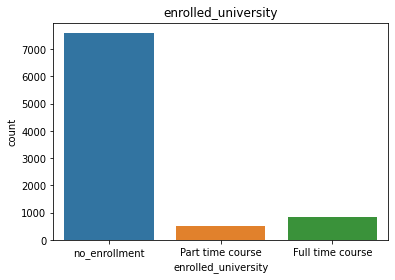

In [17]:
print(data_viz['enrolled_university'].value_counts(),'\n')

sns.countplot(data_viz['enrolled_university']).set(title='enrolled_university')

Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64 



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'education_level')]

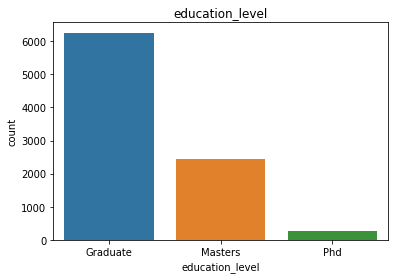

In [18]:
print(data_viz['education_level'].value_counts(),'\n')

sns.countplot(data_viz['education_level']).set(title='education_level')

STEM               7989
Humanities          378
Other               177
Business Degree     170
Arts                129
No Major            112
Name: major_discipline, dtype: int64 



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'major_discipline')]

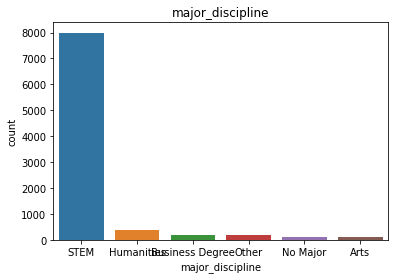

In [19]:
print(data_viz['major_discipline'].value_counts(),'\n')

sns.countplot(data_viz['major_discipline']).set(title='major_discipline')

>20    1881
5       575
10      551
6       535
9       533
7       485
4       480
3       428
8       398
15      398
11      372
14      333
16      304
2       297
12      293
13      235
17      206
19      179
18      168
1       121
<1       97
20       86
Name: experience, dtype: int64 



[Text(0.5, 1.0, 'experience')]

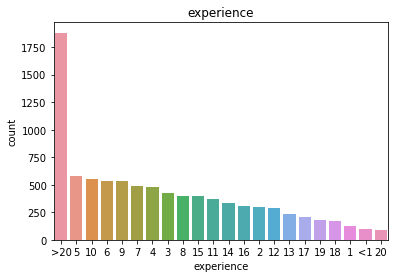

In [20]:
print(data_viz['experience'].value_counts(),'\n')

sns.countplot(x = 'experience',
              data = data_viz,
              order = data_viz['experience'].value_counts().index).set(title='experience')

Pvt Ltd                6794
Funded Startup          784
Public Sector           564
Early Stage Startup     385
NGO                     356
Other                    72
Name: company_type, dtype: int64 



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'company_type')]

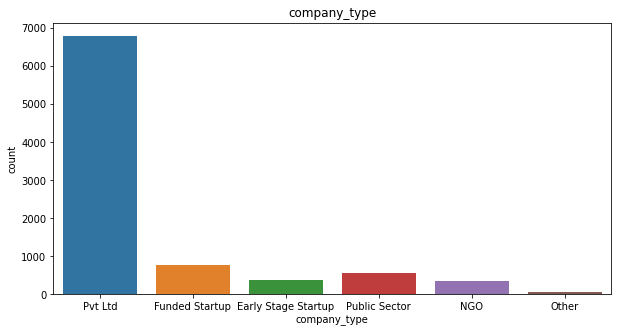

In [21]:
print(data_viz['company_type'].value_counts(),'\n')

plt.figure(figsize=(10,5))
sns.countplot(data_viz['company_type']).set(title='company_type')

# **Encoding**

In [22]:
column_names = new_train_data.columns.values.tolist()
column_names

['city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [23]:
cn = column_names[:10]
cnt = column_names[11]

In [24]:
label_encoder = preprocessing.LabelEncoder()

In [25]:
for i in cn:
  print(i)
  print("Train Before Encoding: " + str(new_train_data[i].unique()))
  new_train_data[i]= label_encoder.fit_transform(new_train_data[i])
  print("Train After Encoding: " + str(new_train_data[i].unique()))
  print(" ")
  print("Test Before Encoding: " + str(new_test_data[i].unique()))
  new_test_data[i]= label_encoder.fit_transform(new_test_data[i])
  print("Test After Encoding: " + str(new_test_data[i].unique()))
  print(" ")
  print(" ")

city_development_index
Train Before Encoding: [0.776 0.767 0.762 0.92  0.913 0.926 0.843 0.624 0.91  0.923 0.666 0.794
 0.924 0.754 0.939 0.887 0.865 0.855 0.827 0.893 0.884 0.866 0.802 0.55
 0.897 0.925 0.896 0.878 0.693 0.698 0.949 0.789 0.903 0.727 0.64  0.516
 0.579 0.804 0.743 0.915 0.899 0.836 0.89  0.795 0.682 0.558 0.796 0.895
 0.769 0.84  0.691 0.742 0.555 0.738 0.527 0.921 0.856 0.479 0.73  0.764
 0.68  0.689 0.848 0.722 0.763 0.74  0.766 0.788 0.83  0.78  0.898 0.847
 0.556 0.512 0.725 0.739 0.563 0.775 0.647 0.701 0.645 0.824 0.745 0.448
 0.735 0.518 0.649 0.781 0.625 0.493 0.487]
Train After Encoding: [47 44 40 83 81 88 62 14 80 85 20 52 86 39 89 71 67 65 58 73 70 68 55  8
 76 87 75 69 25 26 90 51 79 30 16  5 13 56 37 82 78 60 72 53 22 11 54 74
 45 61 24 36  9 33  7 84 66  1 31 42 21 23 64 28 41 35 43 50 59 48 77 63
 10  4 29 34 12 46 18 27 17 57 38  0 32  6 19 49 15  3  2]
 
Test Before Encoding: [0.827 0.92  0.698 0.762 0.624 0.722 0.926 0.91  0.913 0.897 0.924 0.939
 0.

In [26]:
new_train_data['target'].unique()

array([0., 1.])

In [27]:
new_train_data['target']= label_encoder.fit_transform(new_train_data['target'])
new_train_data['target'].unique()

array([0, 1])

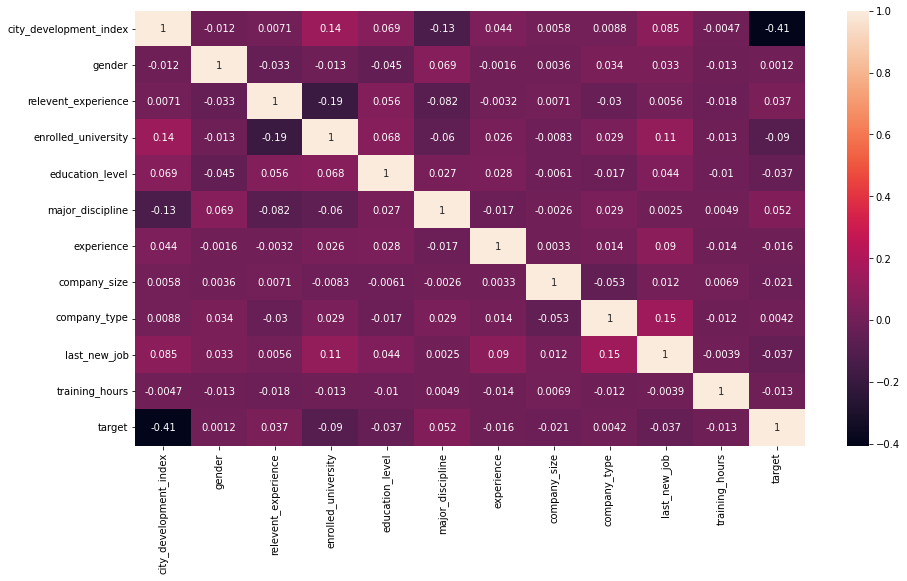

In [28]:
plt.figure(figsize=(15,8))
dataplot=sns.heatmap(new_train_data.corr(), annot=True)
plt.show()

In [29]:
new_train_data.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,47,1,1,2,0,5,6,4,5,4,47,0
4,44,1,0,2,1,5,21,4,1,3,8,0
7,40,1,0,2,0,5,4,7,5,4,18,1
8,83,1,0,2,0,5,17,4,5,0,46,1
11,83,1,0,2,0,5,15,6,5,0,108,0


In [30]:
data_train = new_train_data
data_test = new_test_data

In [31]:
indexs_train = []
indexs_test = []

for i in range (len(data_train)):
  indexs_train.append(i)

for i in range (len(data_test)):
  indexs_test.append(i)

In [32]:
data_train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,47,1,1,2,0,5,6,4,5,4,47,0
4,44,1,0,2,1,5,21,4,1,3,8,0
7,40,1,0,2,0,5,4,7,5,4,18,1
8,83,1,0,2,0,5,17,4,5,0,46,1
11,83,1,0,2,0,5,15,6,5,0,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19147,14,1,1,0,0,5,0,1,5,0,52,1
19149,83,1,0,2,1,5,19,4,5,0,36,1
19150,83,0,0,2,0,5,1,1,4,2,23,0
19152,83,0,0,2,0,2,17,0,1,0,25,0


# **Machine Learning**

In [33]:
X = data_train.drop(['target'], axis=1)
X_Data1 = X.values

Y = data_train["target"]
y_Data1 = Y.values

X = data_test
X_Data2 = X.values

In [34]:
X_Data1.shape

(8955, 11)

In [35]:
X_Data2.shape

(1019, 11)

In [81]:
# X_train, X_test, y_train, y_test = train_test_split(
#              X_Data1, y_Data1, test_size = 0.2, random_state=42)

In [85]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X_Data1, y_Data1,test_size=0.2, shuffle = True, random_state = 8)

In [86]:
# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_Data1, y_Data1, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [84]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (6716, 11)
X_test shape: (1791, 11)
y_train shape: (6716,)
y_test shape: (1791,)
X_val shape: (6716,)
y val shape: (1791,)


## **KNN**

In [40]:
n = []

for i in range(1,16):
  if i % 2 == 0:
    continue
  n.append(i)

print(n)

[1, 3, 5, 7, 9, 11, 13, 15]


neighbors 1:
train_accuracy[i]: 0.9992555092316855
test_accuracy[i]: 0.7666108319374652
neighbors 3:
train_accuracy[i]: 0.8944312090530078
test_accuracy[i]: 0.8280290340591848
neighbors 5:
train_accuracy[i]: 0.8779035139964264
test_accuracy[i]: 0.8341708542713567
neighbors 7:
train_accuracy[i]: 0.8741810601548541
test_accuracy[i]: 0.8336125069793412
neighbors 9:
train_accuracy[i]: 0.8688207266229899
test_accuracy[i]: 0.8397543271915131
neighbors 11:
train_accuracy[i]: 0.8673317450863609
test_accuracy[i]: 0.8336125069793412
neighbors 13:
train_accuracy[i]: 0.867182846932698
test_accuracy[i]: 0.8302624232272473
neighbors 15:
train_accuracy[i]: 0.863013698630137
test_accuracy[i]: 0.8347292015633724


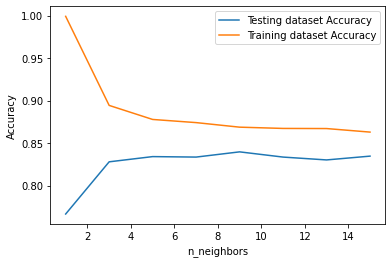

In [41]:
train_accuracy = np.empty(len(n))
test_accuracy = np.empty(len(n))
  
# Loop over K values
for i, k in enumerate(n):
    print("neighbors " + str(k) + ":")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    print("train_accuracy[i]: " + str(train_accuracy[i]))
    test_accuracy[i] = knn.score(X_test, y_test)
    print("test_accuracy[i]: " + str(test_accuracy[i]))
  
# Generate plot
plt.plot(n, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(n, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors=9)
  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [43]:
print(knn.score(X_train, y_train))

0.8688207266229899


In [44]:
print(knn.score(X_test, y_test))

0.8397543271915131


In [45]:
print(knn.predict(X_Data2))

[0 0 1 ... 1 0 0]


In [46]:
knn.score(X_val, y_val)

0.8423403305046896

## **Logistic Regression**

In [47]:
model = LogisticRegression()

In [48]:
model.fit(X_Data1, y_Data1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
print(model.score(X_train, y_train))

0.8417212626563431


In [50]:
print(model.score(X_test, y_test))

0.8358458961474037


In [51]:
print(model.predict(X_Data2))

[0 0 0 ... 0 0 0]


In [52]:
model.score(X_val, y_val)

0.8360875390799464

## **Naive Bayes**

In [53]:
NB = GaussianNB()

In [54]:
NB.fit(X_Data1, y_Data1)

GaussianNB()

In [55]:
print(NB.score(X_train, y_train))

0.8210244192972007


In [56]:
print(NB.score(X_test, y_test))

0.8101619207146845


In [57]:
print(NB.predict(X_Data2))

[0 0 1 ... 1 0 0]


In [58]:
NB.score(X_val, y_val)

0.8119696292987941

## **SVM**

In [59]:
SVM = svm.SVC()

In [60]:
SVM.fit(X_Data1, y_Data1)

SVC()

In [61]:
print(SVM.score(X_train, y_train))

0.8371054198927933


In [62]:
print(SVM.score(X_test, y_test))

0.8319374651032942


In [63]:
print(SVM.predict(X_Data2))

[0 0 0 ... 0 0 0]


In [64]:
SVM.score(X_val, y_val)

0.8329611433675748

## **Decision Trees**

In [65]:
DT = tree.DecisionTreeClassifier()

In [66]:
DT.fit(X_Data1, y_Data1)

DecisionTreeClassifier()

In [67]:
print(DT.score(X_train, y_train))

0.9986599166170339


In [68]:
print(DT.score(X_test, y_test))

0.998324958123953


In [69]:
print(DT.predict(X_Data2))

[0 0 0 ... 0 0 0]


In [70]:
DT.score(X_val, y_val)

0.9982134881643591

# **Table**

In [71]:
Algorithm = ['KNN-9', 'Logistic Regression', 'Naive Bayes', 'SVM', 'Decision Trees']
Training_Accuracy = [knn.score(X_train, y_train), model.score(X_train, y_train), NB.score(X_train, y_train),SVM.score(X_train, y_train), DT.score(X_train, y_train)]
Testing_Accuracy = [knn.score(X_test, y_test), model.score(X_test, y_test), NB.score(X_test, y_test), SVM.score(X_test, y_test), DT.score(X_test, y_test)]
Validation_Accuracy = [knn.score(X_val, y_val), model.score(X_val, y_val), NB.score(X_val, y_val), SVM.score(X_val, y_val), DT.score(X_val, y_val)]

In [72]:
result = pd.DataFrame()
result['Algorithm'] = Algorithm
result['Training_Accuracy'] = Training_Accuracy
result['Testing_Accuracy'] = Testing_Accuracy
result['Validation_Accuracy'] = Validation_Accuracy

In [73]:
result

,Algorithm,Training_Accuracy,Testing_Accuracy,Validation_Accuracy
0,KNN-9,0.868821,0.839754,0.842340
1,Logistic Regression,0.841721,0.835846,0.836088
2,Naive Bayes,0.821024,0.810162,0.811970
3,SVM,0.837105,0.831937,0.832961
4,Decision Trees,0.998660,0.998325,0.998213


In [74]:
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_0 <= 14.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_10 <= 43.50
|   |   |   |--- class: 0
|   |   |--- feature_10 >  43.50
|   |   |   |--- feature_8 <= 4.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  4.50
|   |   |   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_8 <= 3.00
|   |   |   |   |--- feature_10 <= 162.50
|   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |--- feature_10 <= 9.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_10 >  9.50
|   |   |   |   |   |   |   |--- feature_6 <= 6.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_6 >  6.00
|   |   |   |   |   |   |   |   |--- feature_6 <= 12.50
|   |   |   |   |   |   |   |   |   |--- feature_10 <= 37.00
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |